In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras import regularizers
from IPython.display import Image
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom, RandomContrast, Rescaling
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Precision, Recall

In [1]:
! unzip /content/drive/MyDrive/Combined_Dataset.zip
dataset_dir = "/content/content/AIRecognition"

Streaming output truncated to the last 5000 lines.
  inflating: content/AIRecognition/fake/fake-v2/13943.png  
  inflating: content/AIRecognition/fake/fake-v2/2587.jpg  
  inflating: content/AIRecognition/fake/fake-v2/11963.jpg  
  inflating: content/AIRecognition/fake/fake-v2/20878.png  
  inflating: content/AIRecognition/fake/fake-v2/13839.png  
  inflating: content/AIRecognition/fake/fake-v2/19956.png  
  inflating: content/AIRecognition/fake/fake-v2/22093.png  
  inflating: content/AIRecognition/fake/fake-v2/2704.jpg  
  inflating: content/AIRecognition/fake/fake-v2/16898.png  
  inflating: content/AIRecognition/fake/fake-v2/20703.png  
  inflating: content/AIRecognition/fake/fake-v2/23931.png  
  inflating: content/AIRecognition/fake/fake-v2/17039.png  
  inflating: content/AIRecognition/fake/fake-v2/2647.jpg  
  inflating: content/AIRecognition/fake/fake-v2/24691.png  
  inflating: content/AIRecognition/fake/fake-v2/19245.png  
  inflating: content/AIRecognition/fake/fake-v2/1372

In [5]:
img_height = 224
img_width = 224
batch_size = 100

# Load the training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  shuffle=True,
  subset="training",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

# Load the validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="validation",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),  # Randomly flip images horizontally and vertically
    RandomRotation(0.2),  # Randomly rotate images by 20%
    RandomZoom(0.2),  # Randomly zoom into images
    RandomContrast(0.2),  # Randomly adjust contrast
])

augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

class_names = train_ds.class_names

Found 27548 files belonging to 2 classes.
Using 22039 files for training.
Found 27548 files belonging to 2 classes.
Using 5509 files for validation.


In [6]:
inputs = Input(shape=(img_height, img_width, 3))
x = Conv2D(64, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer=Adamax(learning_rate=1e-3),
              loss=BinaryCrossentropy(),
              metrics=['accuracy', Precision(), Recall()])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0     

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

model_history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100,
  callbacks=[early_stopping],
  verbose = 1
)

Epoch 1/100
221/221 [==============================] - 466s 2s/step - loss: 46.2751 - accuracy: 0.6961 - precision: 0.6889 - recall: 0.2494 - val_loss: 0.5570 - val_accuracy: 0.7243 - val_precision: 0.8054 - val_recall: 0.2909
Epoch 2/100
221/221 [==============================] - 456s 2s/step - loss: 0.5000 - accuracy: 0.7496 - precision: 0.8358 - recall: 0.3595 - val_loss: 0.5390 - val_accuracy: 0.7479 - val_precision: 0.7772 - val_recall: 0.4028
Epoch 3/100
221/221 [==============================] - 458s 2s/step - loss: 0.4361 - accuracy: 0.7955 - precision: 0.8290 - recall: 0.5279 - val_loss: 0.5233 - val_accuracy: 0.7535 - val_precision: 0.6915 - val_recall: 0.5475
Epoch 4/100
221/221 [==============================] - 447s 2s/step - loss: 0.3442 - accuracy: 0.8522 - precision: 0.8273 - recall: 0.7331 - val_loss: 0.5041 - val_accuracy: 0.7980 - val_precision: 0.7433 - val_recall: 0.6552
Epoch 5/100
221/221 [==============================] - 438s 2s/step - loss: 0.2375 - accuracy: 

In [9]:
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(val_ds)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

model.save('Custom_2Block')

56/56 [==============================] - 94s 1s/step - loss: 0.5018 - accuracy: 0.8138 - precision: 0.7624 - recall: 0.6880
Val Loss: 0.5018
Val Accuracy: 0.8138
Val Precision: 0.7624
Val Recall: 0.6880


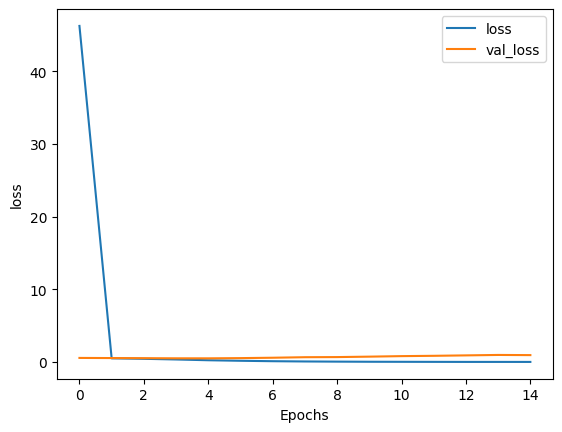

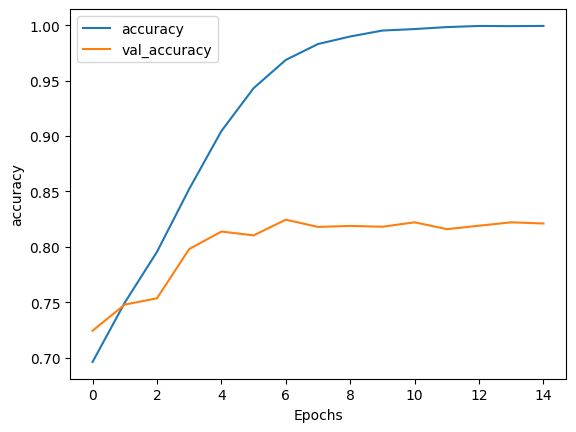

In [11]:
def plot_metrics(history, metric):
    plt.plot(history.history[metric], label = metric)
    plt.plot(history.history['val_' + metric], label='val_' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

plot_metrics(model_history, 'loss')
plot_metrics(model_history, 'accuracy')